In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import geopandas as gpd
import contextily as cx
import matplotlib.ticker as mticker

# Import the data

In [2]:
import glob

# Read all csv files from folder

df = pd.DataFrame()
for file_name in glob.glob('./../../Data_phone/final/processed_pca_data/'+'*.csv'):
    x = pd.read_csv(file_name, low_memory=False)
    df = pd.concat([df,x],axis=0)

In [3]:
df

,lat,lon,0,1,2,3
0,46.844259,16.865110,0.803903,1.122230,0.101862,0.170920
1,46.844256,16.864807,0.803903,1.122230,0.101862,0.170920
2,46.844306,16.864376,0.803903,1.122230,0.101862,0.170920
3,46.844389,16.864009,0.803903,1.122230,0.101862,0.170920
4,46.844454,16.863623,0.803903,1.122230,0.101862,0.170920
...,...,...,...,...,...,...
959,46.825819,16.829702,1.568954,0.014129,-1.254574,0.525306
960,46.825768,16.829632,0.797160,-0.329885,-0.639100,-0.587212
961,46.825722,16.829497,0.797160,-0.329885,-0.639100,-0.587212
962,46.825803,16.829329,0.797160,-0.329885,-0.639100,-0.587212


In [4]:
df.describe()

,lat,lon,0,1,2,3
count,8763.000000,8763.000000,8.763000e+03,8.763000e+03,8.763000e+03,8.763000e+03
mean,46.841010,16.845355,4.540727e-17,2.554159e-16,-3.405545e-17,-2.087924e-17
std,0.020788,0.012171,1.463189e+00,5.806574e-01,4.376630e-01,3.309846e-01
min,46.807867,16.818297,-3.935114e+00,-1.999864e+00,-1.935530e+00,-1.206264e+00
25%,46.827295,16.833651,-1.063251e+00,-3.169181e-01,-2.308972e-01,-1.827400e-01
50%,46.837632,16.847517,-1.574408e-02,-4.367421e-02,-5.228703e-02,1.209818e-02
75%,46.846348,16.853583,8.929412e-01,3.008526e-01,2.163415e-01,1.725466e-01
max,46.899545,16.868996,8.975007e+00,4.100971e+00,2.769373e+00,2.144763e+00


<Axes: ylabel='Frequency'>

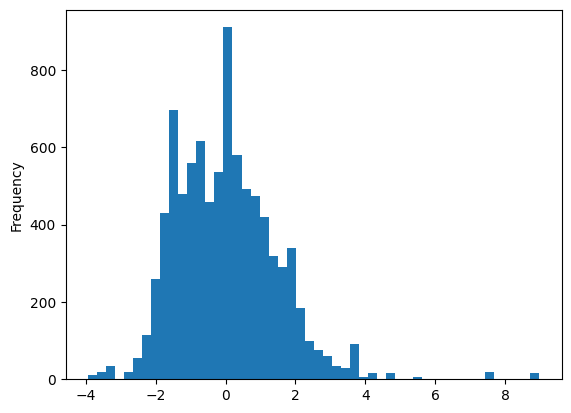

In [6]:
df['0'].plot(kind='hist', bins=50)

In [7]:
fig = px.scatter_mapbox(lat=df[df['0']<4]['lat'], lon=df[df['0']<4]['lon'], color= df[df['0']<4]['0'], zoom=10, width=500, height=500 , color_continuous_scale=px.colors.diverging.RdYlGn_r)
#fig.update_geos(scope='europe')
fig.update_geos(fitbounds="locations")
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
#fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(
    mapbox=dict(
    style="light", 
    accesstoken='pk.eyJ1Ijoicm9sYW5kbmFneSIsImEiOiJjbHRrZXptcWMweTJtMmlzNG40YjNmY3ozIn0.66tCRA-MiLLA-xAKcPiPlw',
    pitch=0,
    zoom=5
    )
)

fig.show()

In [8]:
# Remove outliers according to above histogram

df_clean = df[df['0']<4].reset_index(drop=True)
df_clean.head()

,lat,lon,0,1,2,3
0,46.844259,16.865110,0.803903,1.12223,0.101862,0.17092
1,46.844256,16.864807,0.803903,1.12223,0.101862,0.17092
2,46.844306,16.864376,0.803903,1.12223,0.101862,0.17092
3,46.844389,16.864009,0.803903,1.12223,0.101862,0.17092
4,46.844454,16.863623,0.803903,1.12223,0.101862,0.17092


# Unsupervised Machine learning

In [9]:
# with segmentation
X = df_clean[['0','1','2','3']]
X.columns = [0,1,2,3]

## K-Means

In [10]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

For n_clusters = 2 The average silhouette_score is : 0.41207506178467296
For n_clusters = 3 The average silhouette_score is : 0.34002751198632214
For n_clusters = 4 The average silhouette_score is : 0.2654059188470848
For n_clusters = 5 The average silhouette_score is : 0.24863385109564695
For n_clusters = 6 The average silhouette_score is : 0.24893416481369884
For n_clusters = 7 The average silhouette_score is : 0.2546153410640942
For n_clusters = 8 The average silhouette_score is : 0.24588897233735665
For n_clusters = 9 The average silhouette_score is : 0.25445246482472267
For n_clusters = 10 The average silhouette_score is : 0.24699702759117134


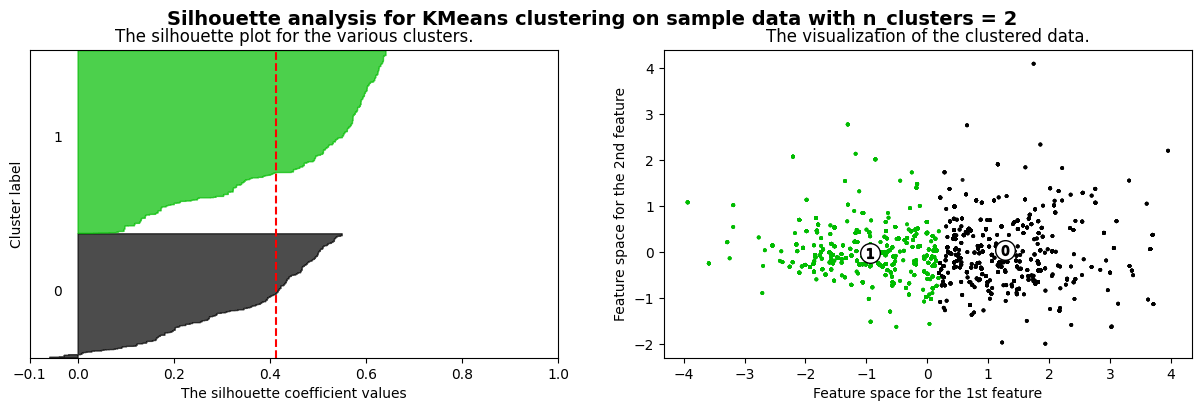

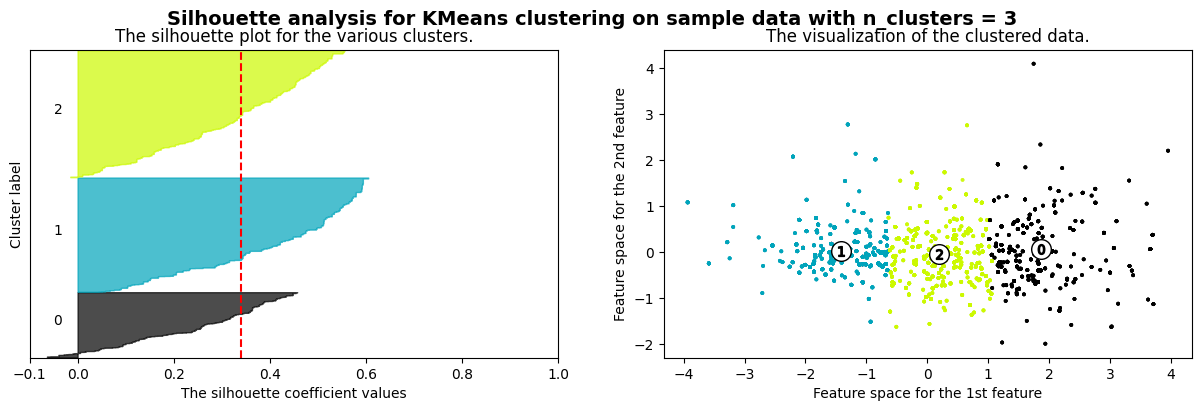

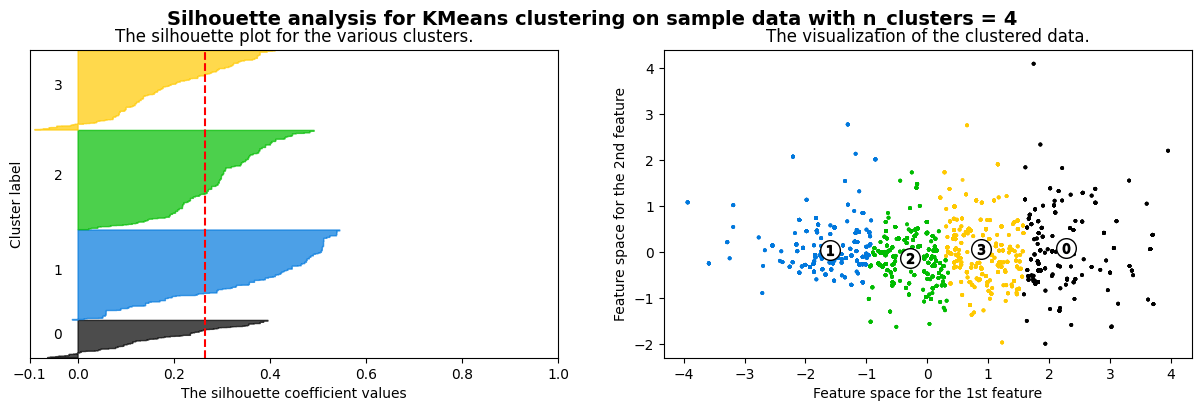

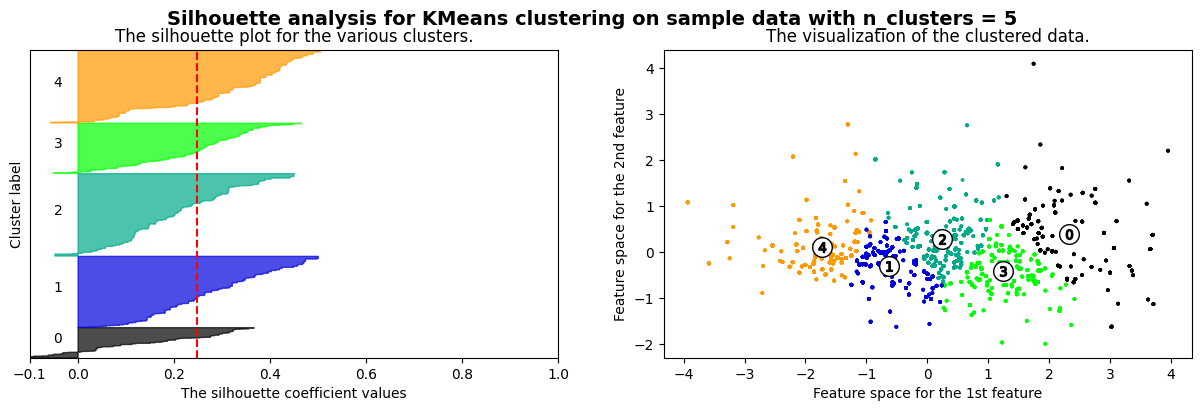

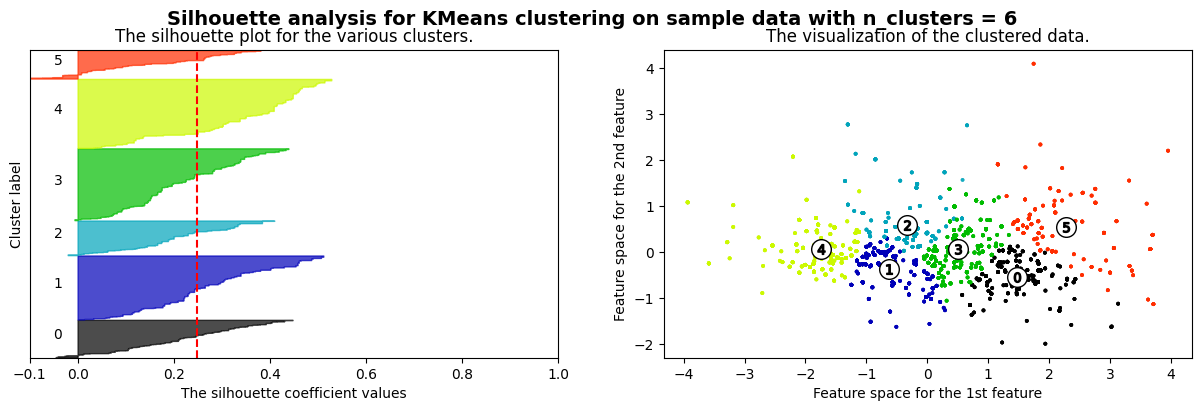

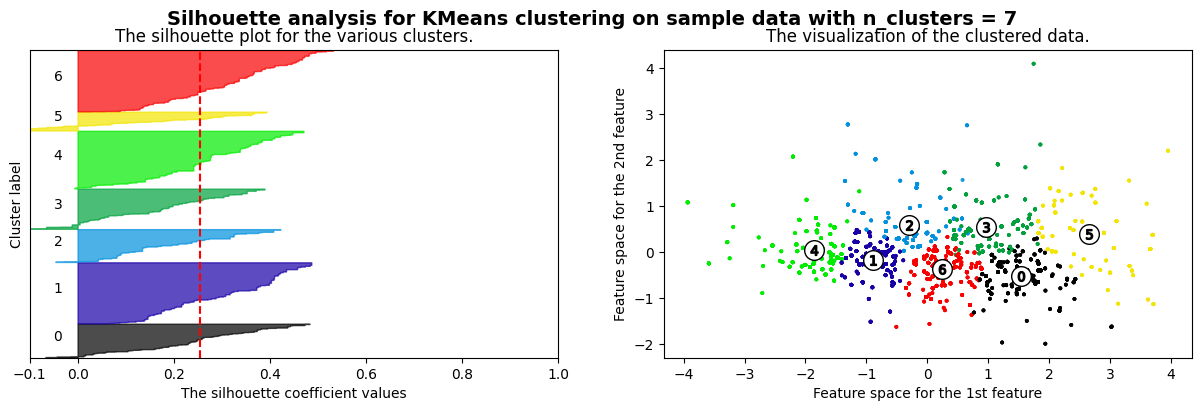

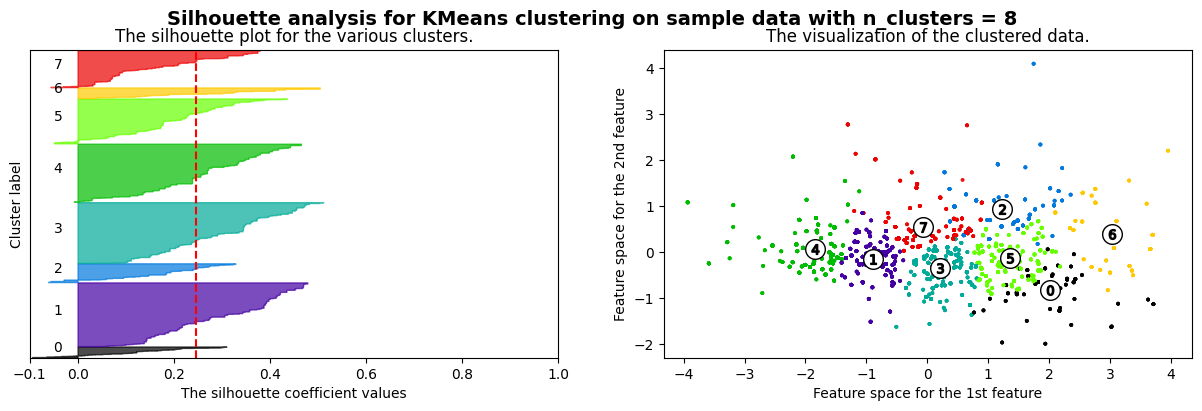

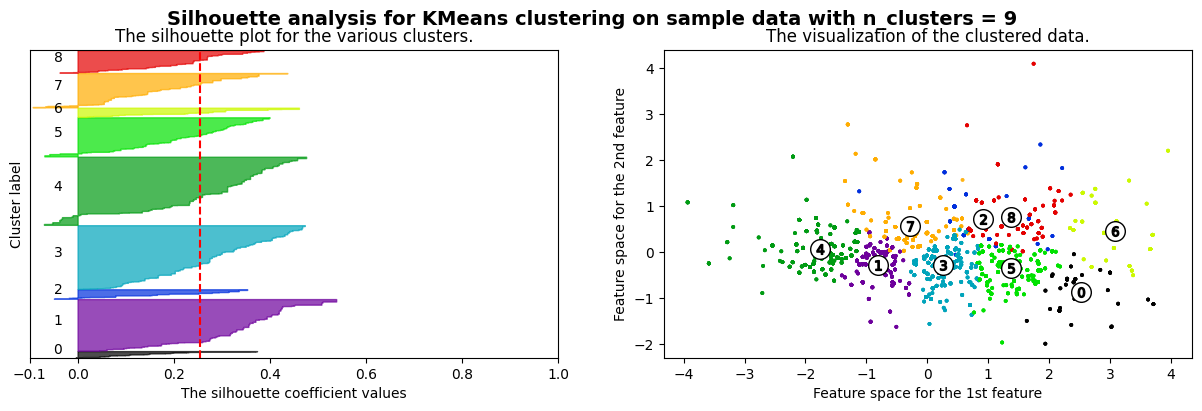

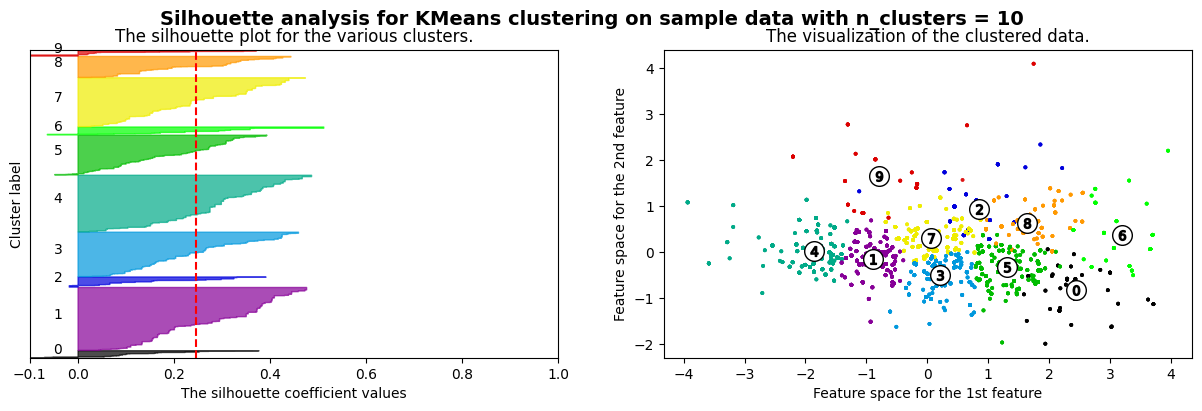

In [11]:
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 4)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[0], X[1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

# Runtime: 

In [12]:
from sklearn.metrics import calinski_harabasz_score

In [13]:
kmeans = KMeans(n_clusters=4, random_state=10)
kmeans.fit_predict(X)

array([3, 3, 3, ..., 3, 3, 3], dtype=int32)

In [14]:
calinski_harabasz_score(X, kmeans.labels_)

5791.799404272867

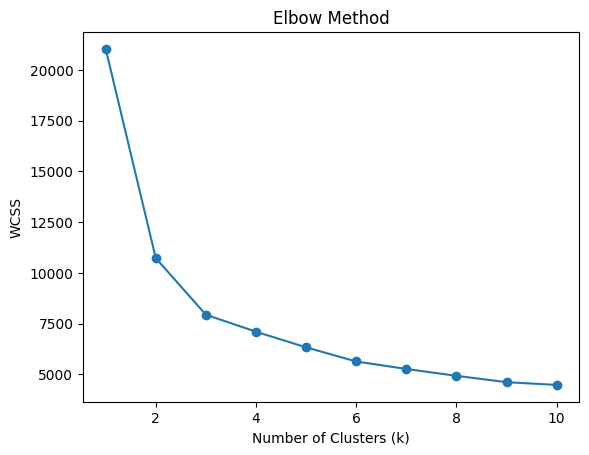

In [15]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
# Plot the elbow method
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [16]:
clusterer = KMeans(n_clusters=4, random_state=10)
cluster_labels = clusterer.fit_predict(X)

In [17]:
kmeans_silhouette = silhouette_score(X, cluster_labels)

<Axes: >

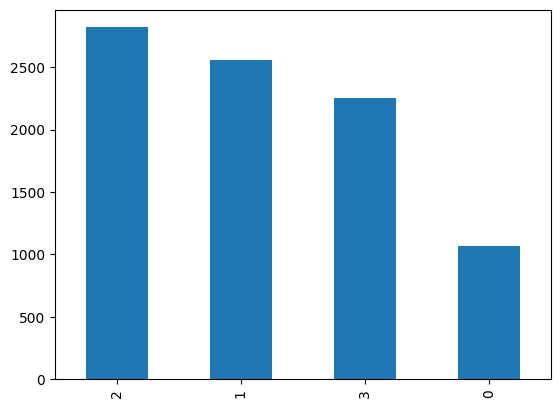

In [18]:
pd.Series(cluster_labels).value_counts().plot(kind='bar')

In [37]:
fig = px.scatter_mapbox(lat=df_clean['lat'], lon=df_clean['lon'], color = cluster_labels, zoom=10, width=500, height=500 , color_continuous_scale=px.colors.diverging.RdYlGn)
#fig.update_geos(scope='europe')
fig.update_geos(fitbounds="locations")
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
#fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(
    mapbox=dict(
    style="light", 
    accesstoken='pk.eyJ1Ijoicm9sYW5kbmFneSIsImEiOiJjbHRrZXptcWMweTJtMmlzNG40YjNmY3ozIn0.66tCRA-MiLLA-xAKcPiPlw',
    pitch=0,
    zoom=5
    )
)

fig.show()

# Export the labels

In [88]:
to_export = pd.concat([df_clean[['lat','lon']], pd.DataFrame(cluster_labels)], axis=1)
to_export

,lat,lon,0
0,46.844259,16.865110,1
1,46.844256,16.864807,1
2,46.844306,16.864376,1
3,46.844389,16.864009,1
4,46.844454,16.863623,1
...,...,...,...
8688,46.825819,16.829702,1
8689,46.825768,16.829632,1
8690,46.825722,16.829497,1
8691,46.825803,16.829329,1


In [89]:
to_export.to_csv('./../../Data_phone/final/labelled_data/unsup_labelled_data.csv', index=False)

## Final model

In [ ]:
# Optimal number of classes is between 4 and 6

# Future tasks: Search feature extraction methods and try another unsupervised learner models

In [ ]:
clusterer = KMeans(n_clusters=4, random_state=10)
cluster_labels = clusterer.fit_predict(X)

In [20]:
cluster_labels[cluster_labels == 2] = 5
cluster_labels[cluster_labels == 3] = 2
cluster_labels[cluster_labels == 5] = 3

In [32]:
cluster_labels[cluster_labels == 1] = 10
cluster_labels[cluster_labels == 2] = 1
cluster_labels[cluster_labels == 10] = 2

In [35]:
cluster_labels[cluster_labels == 2] = 15
cluster_labels[cluster_labels == 3] = 2
cluster_labels[cluster_labels == 15] = 3

In [ ]:
cluster_labels[cluster_labels == 1] = 20
cluster_labels[cluster_labels == 2] = 1
cluster_labels[cluster_labels == 20] = 2

<Axes: >

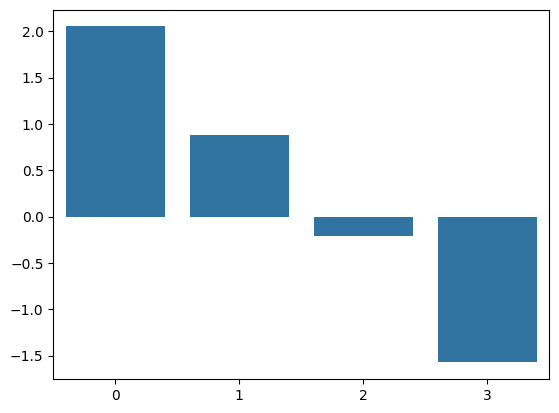

In [36]:
# Median acceleration value per pavement class
sns.barplot(data=[df_clean[cluster_labels==0]['0'].median(), df_clean[cluster_labels==1]['0'].median(), df_clean[cluster_labels==2]['0'].median(), df_clean[cluster_labels==3]['0'].median()])

## Export labelled data

## Supervised model

In [38]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, ConfusionMatrixDisplay, roc_auc_score

In [46]:
df_features = pd.DataFrame()
for file_name in glob.glob('./../../Data_phone/final/processed_features_data/'+'*.csv'):
    x = pd.read_csv(file_name, low_memory=False)
    df_features = pd.concat([df_features,x],axis=0)

In [47]:
df_features

,lat,lon,std_acc_x,median_acc_x,std_acc_y,median_acc_y,std_acc_z,median_acc_z,std_gyr_x,median_gyr_x,std_gyr_y,median_gyr_y,std_gyr_z,median_gyr_z
0,46.844259,16.865110,0.506778,-1.576468,0.901353,-3.106771,0.497146,-2.995824,0.736111,-2.995558,0.446862,-2.794246,1.41163,-3.389744
1,46.844256,16.864807,0.506778,-1.576468,0.901353,-3.106771,0.497146,-2.995824,0.736111,-2.995558,0.446862,-2.794246,1.41163,-3.389744
2,46.844306,16.864376,0.506778,-1.576468,0.901353,-3.106771,0.497146,-2.995824,0.736111,-2.995558,0.446862,-2.794246,1.41163,-3.389744
3,46.844389,16.864009,0.506778,-1.576468,0.901353,-3.106771,0.497146,-2.995824,0.736111,-2.995558,0.446862,-2.794246,1.41163,-3.389744
4,46.844454,16.863623,0.506778,-1.576468,0.901353,-3.106771,0.497146,-2.995824,0.736111,-2.995558,0.446862,-2.794246,1.41163,-3.389744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,46.825819,16.829702,0.632220,-1.736240,0.204625,-2.000289,0.418312,-2.270944,0.515803,-2.511019,0.466586,-1.637227,1.48803,-3.626552
960,46.825768,16.829632,0.000000,-1.736240,0.419741,-2.623207,0.187144,-2.974883,0.253238,-2.770386,0.173719,-1.843334,0.00000,-3.626552
961,46.825722,16.829497,0.000000,-1.736240,0.419741,-2.623207,0.187144,-2.974883,0.253238,-2.770386,0.173719,-1.843334,0.00000,-3.626552
962,46.825803,16.829329,0.000000,-1.736240,0.419741,-2.623207,0.187144,-2.974883,0.253238,-2.770386,0.173719,-1.843334,0.00000,-3.626552


In [48]:
len(cluster_labels)

8693

In [49]:
df.reset_index(drop=True, inplace=True)

In [50]:
indexes = df[df['0']>=4].index

In [51]:
df_features.reset_index(drop=True, inplace=True)

In [52]:
df_features.drop(indexes, inplace=True)

In [53]:
print(len(df_features))
len(cluster_labels)

8693


8693

In [67]:
ml = pd.concat([df_features.reset_index(drop=True), pd.DataFrame(cluster_labels)], axis=1)

In [74]:
ml.drop_duplicates(subset='std_acc_x', inplace=True)

In [75]:
len(ml)

501

In [76]:
ml.head()

,lat,lon,std_acc_x,median_acc_x,std_acc_y,median_acc_y,std_acc_z,median_acc_z,std_gyr_x,median_gyr_x,std_gyr_y,median_gyr_y,std_gyr_z,median_gyr_z,0
0,46.844259,16.865110,0.506778,-1.576468,0.901353,-3.106771,0.497146,-2.995824,0.736111,-2.995558,0.446862,-2.794246,1.411630,-3.389744,1
40,46.844407,16.856113,0.754784,-1.576468,0.667534,-3.509393,0.692952,-2.226210,0.263028,-3.165346,0.409176,-2.747072,1.229173,-3.147026,1
45,46.844208,16.855971,0.697480,-2.054241,1.019697,-5.025059,0.773841,-3.857923,0.451040,-4.013648,0.534790,-3.496103,1.580200,-4.898088,3
75,46.843222,16.855323,0.927303,-1.697716,0.267586,-4.241144,0.822179,-2.522654,0.457872,-3.679649,0.560166,-3.177479,0.908812,-4.844123,2
80,46.843093,16.855222,0.247173,-2.805392,0.505024,-4.549303,0.215797,-3.594274,0.443411,-4.011566,0.133768,-3.797821,0.454628,-5.587776,3


In [82]:
X = ml.drop(columns=['lat','lon',0],axis=1)
y = ml[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [83]:
model = RandomForestClassifier(n_estimators=100,random_state=101)

In [84]:
model.fit(X_train,y_train)

RandomForestClassifier(random_state=101)

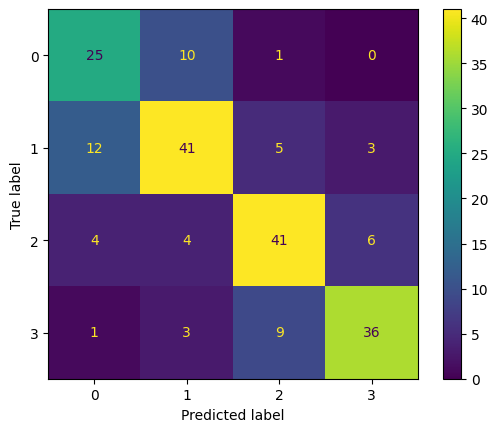

In [85]:
preds = model.predict(X_test)

cm = confusion_matrix(y_test, preds, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

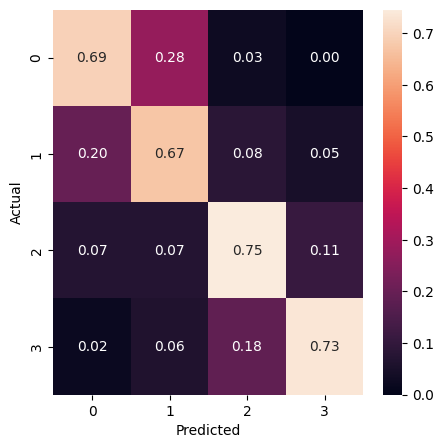

In [86]:
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)